In [181]:
import os
os.environ["SDSS_LOCAL_SAS_MIRROR"]="/data/jdli/sdss/"
os.environ["RESULTS_VERS"]="dr17"
os.environ["GAIA_TOOLS_DATA"]="/data/jdli/gaia/"

%matplotlib inline
%load_ext autoreload
%autoreload 2
from pylab import *

from astropy.table import Table, join
from astropy.io import fits
from tqdm import tqdm
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm


from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmasher as cmr
cmap = plt.get_cmap('cmr.dusk')   # MPL


%config InlineBackend.figure_format = "retina"
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
data_dir = os.environ["GAIA_TOOLS_DATA"]+"/model/GXPcont_abundance/"
df = pd.read_csv(data_dir+"xp_valid.csv")
print(df.shape, df.columns)

(73856, 65) Index(['source_id', 'moh_model_cross', 'aom_model_cross', 'moh_model_self',
       'aom_model_self', 'set_id', 'APOGEE_ID', 'TELESCOPE', 'FIELD', 'ALT_ID',
       'RA', 'DEC', 'GLON', 'GLAT', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR',
       'AK_TARG', 'AK_TARG_METHOD', 'AK_WISE', 'SFD_EBV', 'SNR', 'SNREV',
       'STARFLAG', 'STARFLAGS', 'ANDFLAG', 'ANDFLAGS', 'VHELIO_AVG',
       'VSCATTER', 'VERR', 'GAIAEDR3_SOURCE_ID', 'GAIAEDR3_PARALLAX',
       'GAIAEDR3_PARALLAX_ERROR', 'GAIAEDR3_PMRA', 'GAIAEDR3_PMRA_ERROR',
       'GAIAEDR3_PMDEC', 'GAIAEDR3_PMDEC_ERROR', 'GAIAEDR3_PHOT_G_MEAN_MAG',
       'GAIAEDR3_PHOT_BP_MEAN_MAG', 'GAIAEDR3_PHOT_RP_MEAN_MAG',
       'GAIAEDR3_DR2_RADIAL_VELOCITY', 'GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR',
       'GAIAEDR3_R_MED_GEO', 'GAIAEDR3_R_LO_GEO', 'GAIAEDR3_R_HI_GEO',
       'GAIAEDR3_R_MED_PHOTOGEO', 'GAIAEDR3_R_LO_PHOTOGEO',
       'GAIAEDR3_R_HI_PHOTOGEO', 'ASPCAPFLAG', 'ASPCAPFLAGS', 'TEFF',
       'TEFF_ERR', 'LOGG', 'LOGG_ERR', 'M_H', '

In [188]:
def draw_compare_sim(ax, out_lst, y_lst, xmin=-2, xmax=0.5):
    xx = np.linspace(xmin, xmax)
    
    norm_res = y_lst-out_lst
    print(np.nanstd(norm_res), np.nanmean(norm_res))
    ax.plot(xx, xx, ls=':', lw=3, c='k', zorder=5)
    ax.hist2d(y_lst, out_lst, bins=200, cmap=cmap, zorder=4, norm=LogNorm())
    ax.set_xlim([xmin, xmax]);
    ax.set_ylim([xmin, xmax]);
    ax.set_ylabel(r"Gaia XP");
    
    divider = make_axes_locatable(ax)
    ax_s = divider.append_axes("bottom", size="33%", pad=0)

    ax.figure.add_axes(ax_s)
    ax_s.hist2d(y_lst, norm_res, bins=200, cmap=cmap, zorder=5, norm=LogNorm())
    ax_s.axhline(y=0, c='k', zorder=6, lw=3, ls=":")
    ax_s.set_xlabel(r"APOGEE");
    ax_s.set_ylim([-0.62, 0.62]);
    ax_s.set_xlim([xmin, xmax]);
    
    ax.set_xticks([]);

    return ax, ax_s

0.1354217162176169 0.011890564993150228
0.12500515827903064 0.011597751006892776


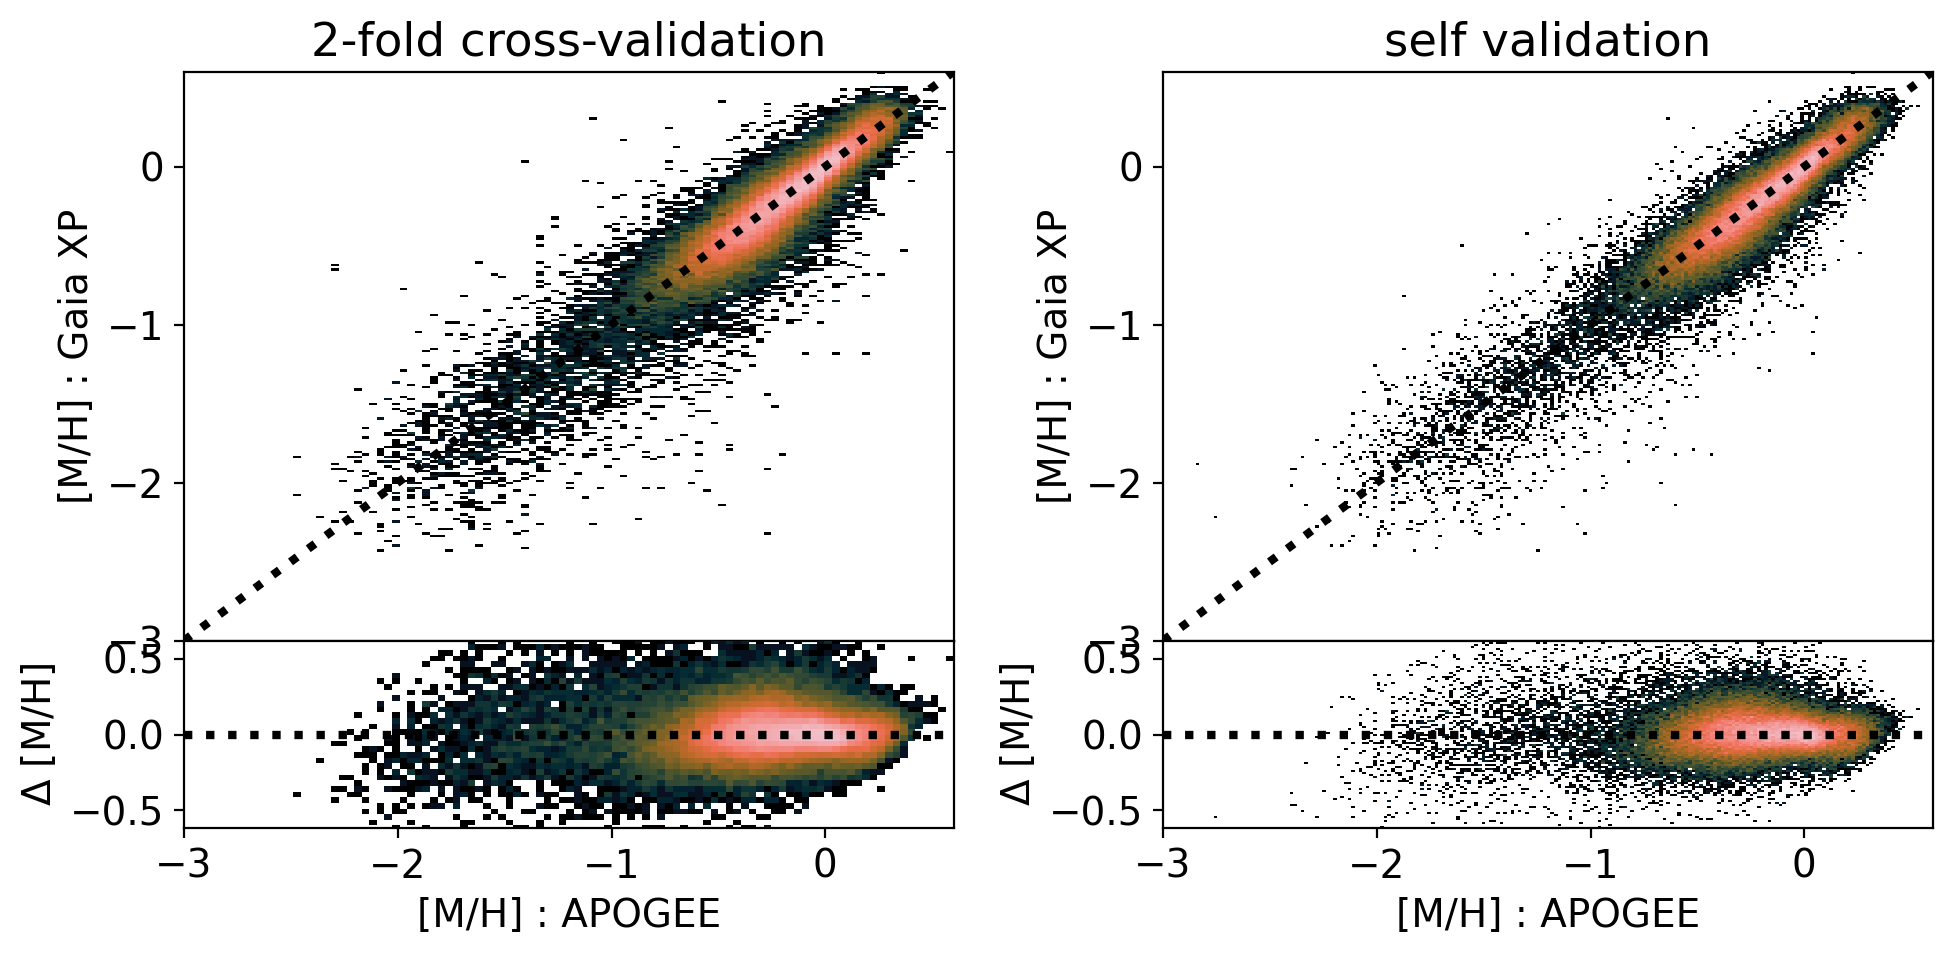

In [190]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

ylabel = ['moh_model_cross', 'moh_model_self']
for i,ax in enumerate(axs.ravel()):

    ax, ax_s = draw_compare_sim(ax, df['M_H'], df[ylabel[i]], xmin=-3.0, xmax=0.6)

    ax_s.set_xlabel(r"[M/H] : APOGEE");
    ax_s.set_ylabel(r'$\Delta$ [M/H]');
    ax.set_ylabel(r"[M/H] : Gaia XP");
    
    if i==0:
        ax.set_title("2-fold cross-validation");
    else:
        ax.set_title("self validation");
        
plt.tight_layout()

0.05814067714629045 -0.0019054901711015272
0.05607716445968768 -0.0020132458798213667


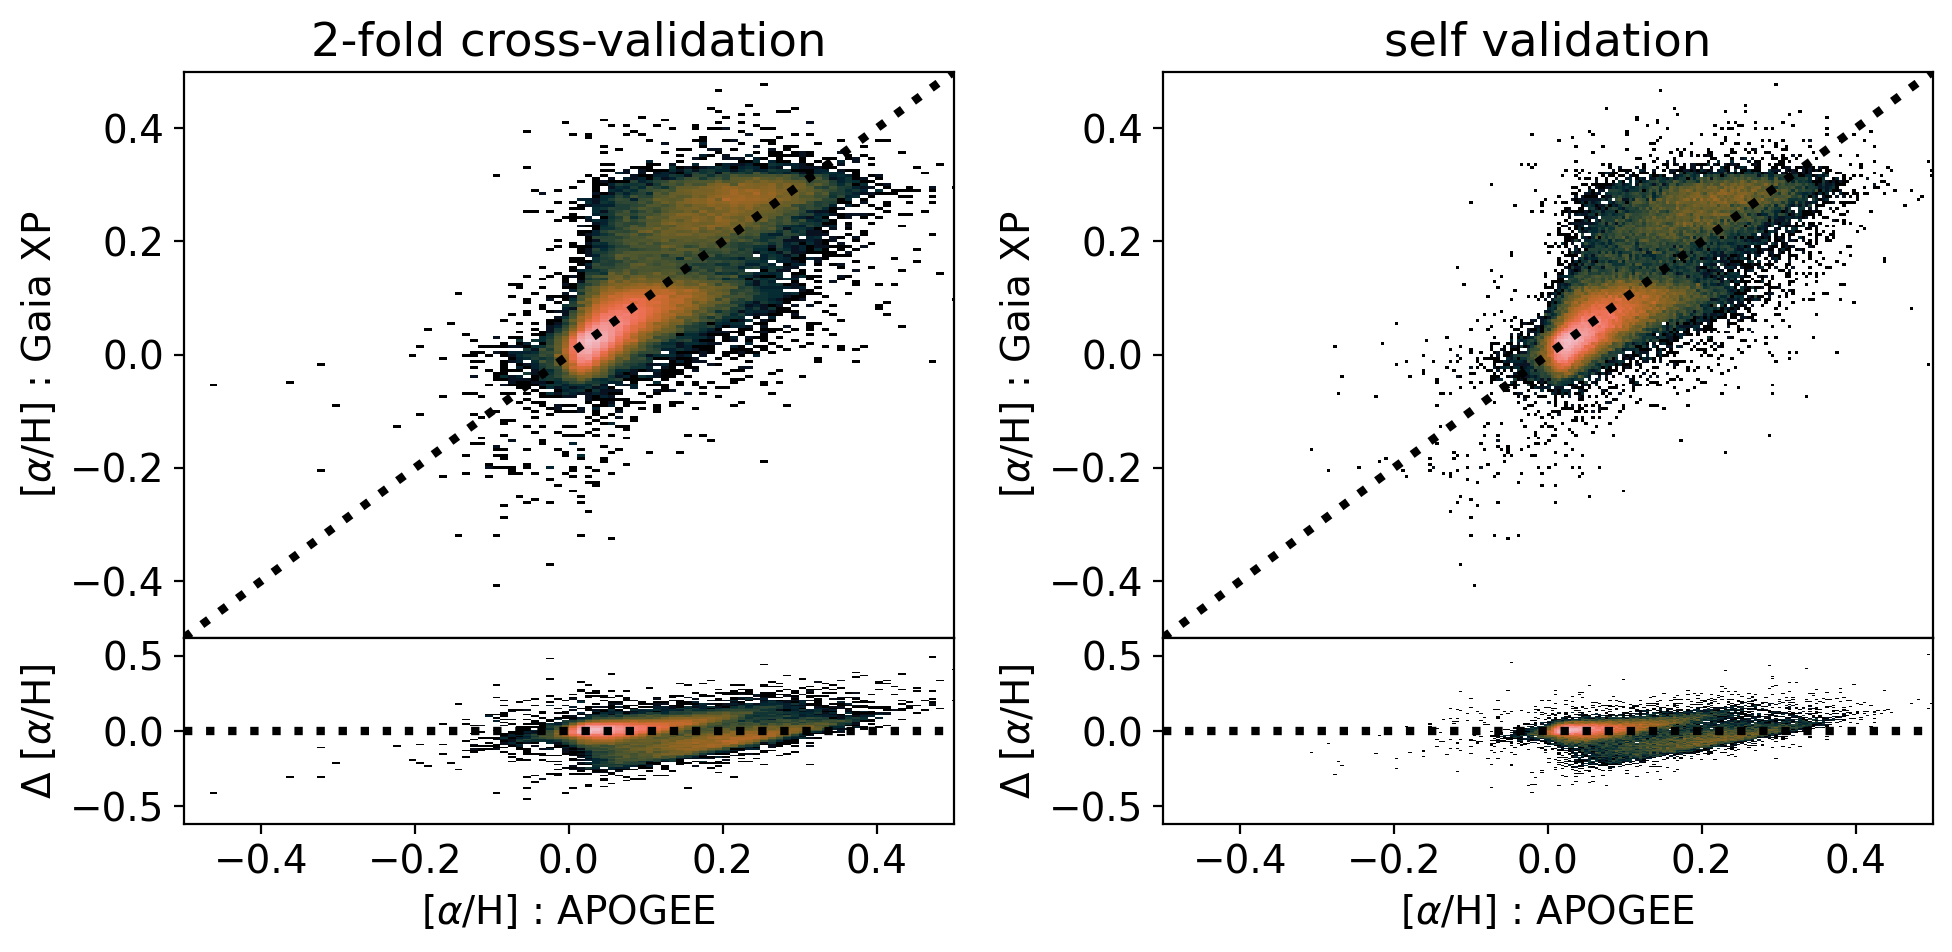

In [191]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
ax1, ax2 = axs.ravel()

ylabel = ['aom_model_cross', 'aom_model_self']

for i,ax in enumerate(axs.ravel()):

    ax, ax_s = draw_compare_sim(ax, df['ALPHA_M'], df[ylabel[i]], xmin=-0.5, xmax=0.5)
    
    ax_s.set_xlabel(r"[$\alpha$/H] : APOGEE");
    ax_s.set_ylabel(r'$\Delta$ [$\alpha$/H]');
    ax.set_ylabel(r"[$\alpha$/H] : Gaia XP");
    
    if i==0:
        ax.set_title("2-fold cross-validation");
    else:
        ax.set_title("self validation");
        
plt.tight_layout()

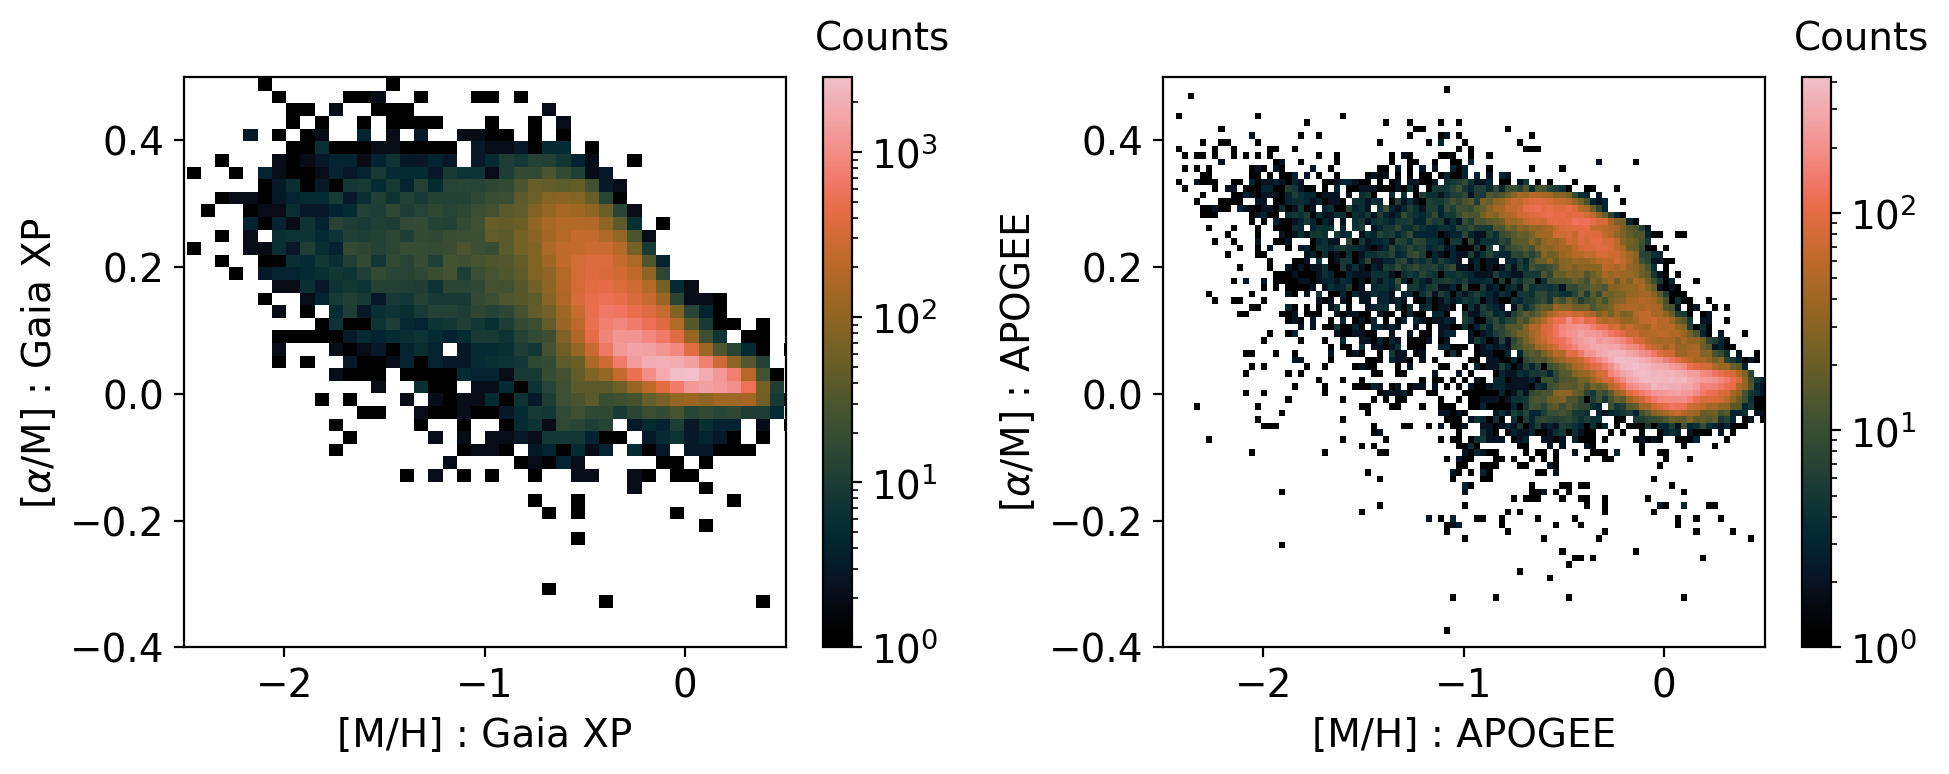

In [199]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
ax1, ax2 = axs.ravel()

_, _, _, img1 = ax1.hist2d(df['moh_model_cross'], df['aom_model_cross'],bins=100, 
                           norm=LogNorm(), cmap=cmap)
_, _, _, img2 = ax2.hist2d(df['M_H'], df['ALPHA_M'], bins=100, norm=LogNorm(), 
                           cmap=cmap)

clb1 = fig.colorbar(img1, ax=ax1,);
clb1.set_label('Counts', labelpad=-20, y=1.1, rotation=0)
               
clb2 = fig.colorbar(img2, ax=ax2, );
clb2.set_label('Counts', labelpad=-20, y=1.1, rotation=0)

ax1.set_xlabel("[M/H] : Gaia XP");
ax1.set_ylabel(r"[$\alpha$/M] : Gaia XP");

ax2.set_xlabel("[M/H] : APOGEE");
ax2.set_ylabel(r"[$\alpha$/M] : APOGEE");
plt.tight_layout()

for ax in axs.ravel():
    ax.set_xlim([-2.5, 0.5]);
    ax.set_ylim([-0.4, 0.5])
    
plt.tight_layout()

In [26]:
from astropy.io import ascii
import seaborn as sns
from astropy.table import Table

# octable = Table.read("J_A+A_661_A118_table2.dat.gz.fits")
octable = Table.read("ocCastroGinard_tmass.fits")
ocdf = octable.to_pandas()
print(ocdf.shape, ocdf.columns)

(24440, 30) Index(['Seq', 'Cluster', 'GaiaEDR3', 'RAdeg', 'DEdeg', 'GLON', 'GLAT', 'plx',
       'pmRA', 'pmDE', 'RV', 'Gmag', 'BP-RP', '2MASS', 'RAJ2000', 'DEJ2000',
       'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag',
       'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD',
       'angDist'],
      dtype='object')


# cross match 2MASS

In [24]:
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance

oc_coords = SkyCoord(ocdf['RAdeg']*u.deg,ocdf['DEdeg']*u.deg)
oc_coords


<SkyCoord (ICRS): (ra, dec) in deg
    [(267.52504422, -29.36419051), (267.56702874, -29.30533627),
     (267.48840603, -29.26705314), ..., (231.05121496, -61.97001666),
     (230.66663397, -62.0351714 ), (230.921316  , -61.92785265)]>

In [ ]:
# from astroquery.vizier import Vizier


# v = Vizier(catalog="II/246", columns=['*', 'Date'])  
# v.ROW_LIMIT = -1

# result = v.query_region(oc_coords, radius=0.5*u.deg)
# tmass_table = result[0]

In [70]:
def abs_mag(mag, prlx):
    # return mag - 5*np.log10(1e3/prlx) + 5
    return mag + 5*np.log10(prlx) - 10

/tmp/ipykernel_69999/3959715551.py:3: RuntimeWarning: invalid value encountered in log10
  return mag + 5*np.log10(prlx) - 10


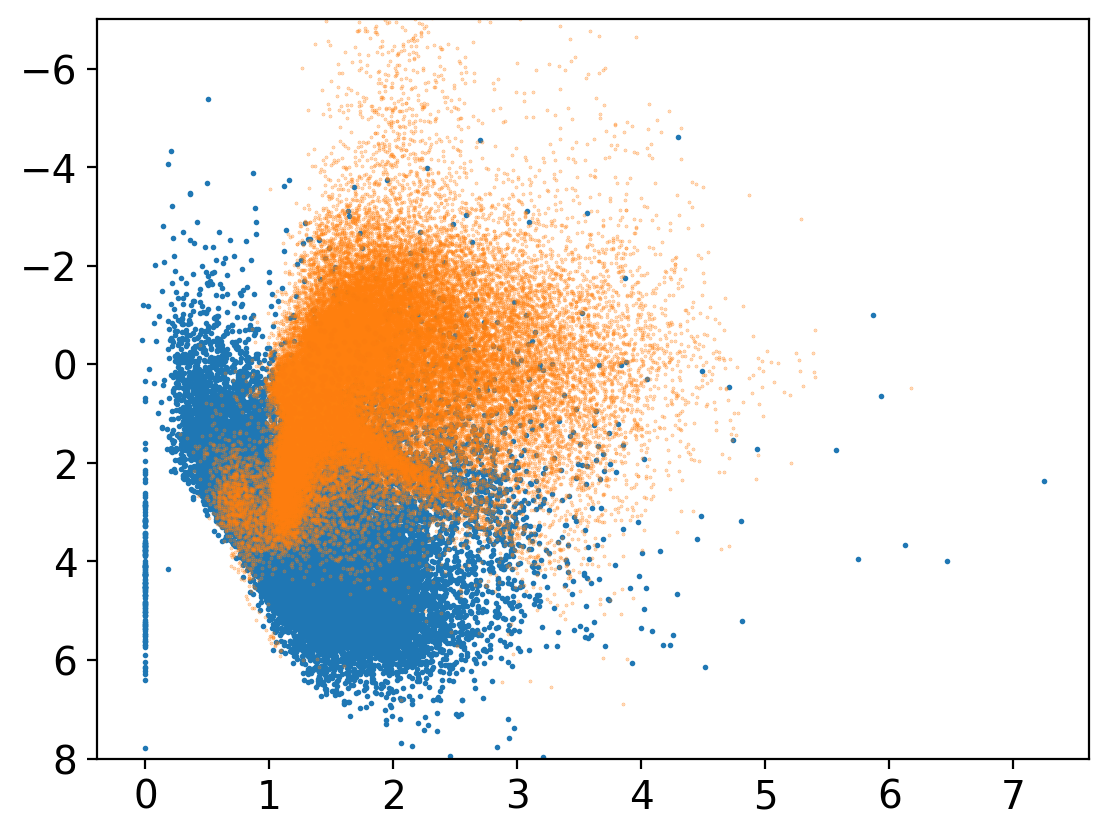

In [71]:
plt.scatter(ocdf['BP-RP'], abs_mag(ocdf['Gmag'].values,ocdf['plx'].values), s=1)


plt.scatter(df['GAIAEDR3_PHOT_BP_MEAN_MAG']-df['GAIAEDR3_PHOT_RP_MEAN_MAG'], 
            abs_mag(df['GAIAEDR3_PHOT_G_MEAN_MAG'].values, df['GAIAEDR3_PARALLAX'].values), s=0.1, alpha=0.5)

plt.ylim([8, -7,]);

In [10]:
from astroquery.gaia import Gaia
Gaia.login()

#jli06
#zwHD5BFFcbT@HZW

INFO: Login to gaia TAP server [astroquery.gaia.core]


User:  jli06
Password:  ········


OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK


In [11]:
def chunks(lst, n):
    ""
    "Split an input list into multiple chunks of size =< n"
    ""
    for i in range(0, len(lst), n):
        yield lst[i:i+n]
        
        
dl_threshold = 5000               # DataLink server threshold. It is not possible to download products for more than 5000 sources in one single call.
ids          = octable['GaiaEDR3']
ids_chunks   = list(chunks(ids, dl_threshold))
datalink_all = []


print(f'* Input list contains {len(ids)} source_IDs')
print(f'* This list is split into {len(ids_chunks)} chunks of <= {dl_threshold} elements each')

* Input list contains 25466 source_IDs
* This list is split into 6 chunks of <= 5000 elements each


In [12]:
retrieval_type = 'XP_CONTINUOUS'          # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'COMBINED'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
data_release   = 'Gaia DR3' # Options are: 'Gaia DR3' (default), 'Gaia DR2'
dl_key         = f'{retrieval_type}_{data_structure}.xml'

datalink_all = []

# dl_keys  = [inp for inp in datalink.keys()]
# dl_keys.sort()

ii = 0
for chunk in ids_chunks:
    ii+=1
    print(f'Downloading Chunk #{ii}; N_files = {len(chunk)}')
    datalink  = Gaia.load_data(ids=chunk,
                               data_release = data_release, 
                               retrieval_type=retrieval_type, format='votable',
                               data_structure=data_structure)
    
    datalink_all.append(datalink)

In [14]:
import joblib

scaler_bp = joblib.load('model/scaler_bp.gz')
scaler_rp = joblib.load('model/scaler_rp.gz')

In [18]:
product_list_tb  = [item for sublist in datalink_all for item in sublist[dl_key]]
# product_list_ids = [item.get_field_by_id("source_id") for sublist in datalink_all for item in sublist[dl_key]]
product_list_ids = [sid for sublist in datalink_all for item in sublist[dl_key] for sid in item.array["source_id"].data]


from tqdm import tqdm
N_COEFF = 55


bp_coef = []
rp_coef = []

i = 0
for kk,tab in tqdm(enumerate(product_list_tb)):
    
    bp_coefficients         = np.array([d.data for d in tab.array["bp_coefficients"]]).reshape(-1, N_COEFF)
    bp_coefficients_errors  = np.array([d.data for d in tab.array["bp_coefficient_errors"]]).reshape(-1, N_COEFF)


    rp_coefficients         = np.array([d.data for d in tab.array["rp_coefficients"]]).reshape(-1, N_COEFF)
    rp_coefficients_errors  = np.array([d.data for d in tab.array["rp_coefficient_errors"]]).reshape(-1, N_COEFF)
    
    bp_coef.append(bp_coefficients)
    rp_coef.append(rp_coefficients)
    
bp_coef = np.vstack(tuple([_ for _ in bp_coef]))
rp_coef = np.vstack(tuple([_ for _ in rp_coef]))

print(bp_coef.shape, rp_coef.shape)
print(len(product_list_ids))

# np.save(data_dir+"ocCastroGinard_xp_raw.npy",
#         {'spec':xp_spec, 
#          'source_id':product_list_ids})

6it [00:00, 14.16it/s]

(21534, 55) (21534, 55)
21534
(21534, 14)


In [27]:
import pandas as pd

df_xpcontinous = pd.DataFrame({'source_id':product_list_ids})

df_xpcontinous = df_xpcontinous.merge(ocdf, left_on='source_id', right_on='GaiaEDR3', how='left')
print(df_xpcontinous.shape)
    
data_dir = "/data/jdli/gaia/"
data_cont ={'bp_coef':bp_coef, 'rp_coef':rp_coef, 'df':df_xpcontinous}
np.save(data_dir+"ocCastroGinard_xp_raw.npy", data_cont)

(21534, 31)


In [29]:
df_xpcontinous.columns

Index(['source_id', 'Seq', 'Cluster', 'GaiaEDR3', 'RAdeg', 'DEdeg', 'GLON',
       'GLAT', 'plx', 'pmRA', 'pmDE', 'RV', 'Gmag', 'BP-RP', '2MASS',
       'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag',
       'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X',
       'MeasureJD', 'angDist'],
      dtype='object')

In [28]:
data_cont.update(norm_bp_coef=scaler_bp.transform(bp_coef),
                 norm_rp_coef=scaler_rp.transform(rp_coef))

np.save(data_dir+"ocCastroGinard_xp_raw.npy", data_cont)

# Globular Cluster validation

In [72]:
from astropy.io import ascii

gctable =  ascii.read("ftp://cdsarc.u-strasbg.fr/ftp/J/A+A/622/A191/table2.dat",
                   readme="ftp://cdsarc.u-strasbg.fr/ftp/J/A+A/622/A191/ReadMe")

df_gcraw = gctable.to_pandas()

print(df_gcraw.shape, df_gcraw.columns)

(885, 48) Index(['---', '2MASS', 'Cluster', 'Evol', 'Teff', 'logg', '[Fe/H]', 'e_[Fe/H]',
       'l_[C/Fe]', '[C/Fe]', 'e_[C/Fe]', 'o_[C/Fe]', 'l_[N/Fe]', '[N/Fe]',
       'e_[N/Fe]', 'o_[N/Fe]', 'l_[O/Fe]', '[O/Fe]', 'e_[O/Fe]', 'o_[O/Fe]',
       'l_[Mg/Fe]', '[Mg/Fe]', 'e_[Mg/Fe]', 'o_[Mg/Fe]', 'l_[Al/Fe]',
       '[Al/Fe]', 'e_[Al/Fe]', 'o_[Al/Fe]', 'l_[Si/Fe]', '[Si/Fe]',
       'e_[Si/Fe]', 'o_[Si/Fe]', 'l_[K/Fe]', '[K/Fe]', 'e_[K/Fe]', 'o_[K/Fe]',
       'l_[Ca/Fe]', '[Ca/Fe]', 'e_[Ca/Fe]', 'o_[Ca/Fe]', 'l_[Ce/Fe]',
       '[Ce/Fe]', 'e_[Ce/Fe]', 'o_[Ce/Fe]', 'l_[Nd/Fe]', '[Nd/Fe]',
       'e_[Nd/Fe]', 'o_[Nd/Fe]'],
      dtype='object')


In [73]:

df_gcraw = df_gcraw.assign(tmass_id=df_gcraw['---']+df_gcraw['2MASS'])
df_gcraw.head()


,---,2MASS,Cluster,Evol,Teff,logg,[Fe/H],e_[Fe/H],l_[C/Fe],[C/Fe],...,o_[Ca/Fe],l_[Ce/Fe],[Ce/Fe],e_[Ce/Fe],o_[Ce/Fe],l_[Nd/Fe],[Nd/Fe],e_[Nd/Fe],o_[Nd/Fe],tmass_id
0,2M,17162228+4258036,M92,RGB,4978,1.84,NaN,NaN,NaN,NaN,...,1,<,1.928,NaN,1,NaN,NaN,NaN,0,2M17162228+4258036
1,2M,17163577+4256392,M92,RGB,5051,2.03,-2.199,0.254,<,1.684,...,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2M17163577+4256392
2,2M,17163748+4306155,M92,RGB,4389,0.42,-2.130,0.132,NaN,-0.364,...,1,NaN,-0.258,0.058,3,NaN,NaN,NaN,0,2M17163748+4306155
3,2M,17164330+4304161,M92,RGB,4949,1.76,-2.191,0.032,<,1.230,...,1,<,2.022,NaN,1,NaN,NaN,NaN,0,2M17164330+4304161
4,2M,17164395+4307318,M92,RGB,4913,1.67,-2.235,0.235,<,0.950,...,1,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2M17164395+4307318


In [130]:
df_gc['Evol'].unique()

array(['RGB', 'eAGB'], dtype=object)

In [101]:

df_gc = pd.merge(df, df_gcraw, on="tmass_id", )
print(df_gc.shape)

(116, 113)


In [102]:
df_gc.Cluster.unique()

array(['M3', 'M92', 'M15', 'M107', 'M5', 'M13', 'M2', 'M53', 'M71'],
      dtype=object)

In [115]:
df_gc.columns

df_gc = df_gc[df_gc["Cluster"]!='M53']

df_gc.to_csv(data_dir+"Masseron19GC_jd.csv", index=False)

In [116]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


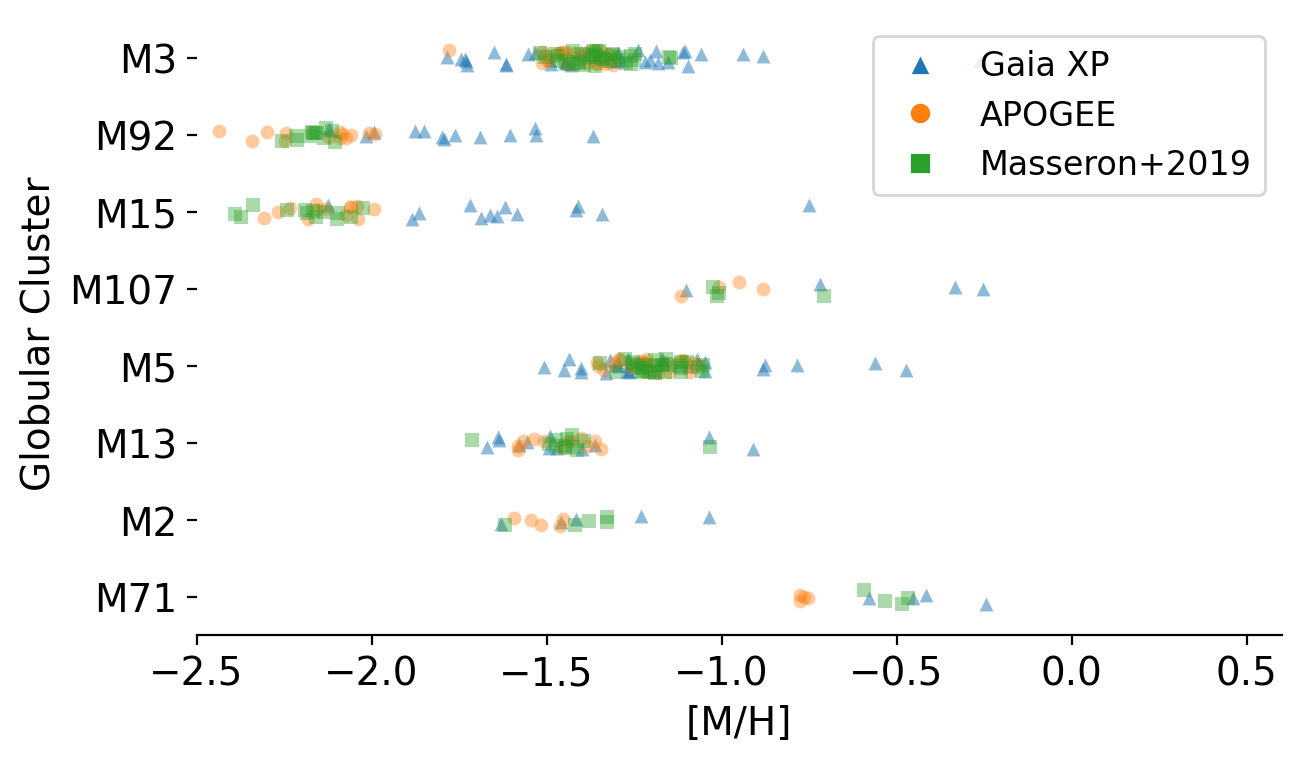

In [192]:
# Initialize the figure
from matplotlib.lines import Line2D

f, ax = plt.subplots(1,1,figsize=(7,4))
sns.despine(left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=df_gc, x="moh_model_cross", y="Cluster", 
    marker='^',
    dodge=True, alpha=.5, zorder=1, legend=False,
    ax=ax
)

sns.stripplot(
    data=df_gc, x="M_H", y="Cluster", marker='o',
    dodge=True, alpha=.4, zorder=1, legend=False
)

sns.stripplot(
    data=df_gc, x="[Fe/H]", y="Cluster", marker='s',
    dodge=True, alpha=.4, zorder=1, legend=False
)

legend_elements = [
    Line2D([0], [0], marker='^', color='w', label='Gaia XP', markerfacecolor='#1f77b4', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='APOGEE', markerfacecolor='#ff7f0e', markersize=8),
    Line2D([0], [0], marker='s', color='w', label='Masseron+2019', markerfacecolor='#2ca02c', markersize=8),
]

ax.legend(handles=legend_elements, loc='upper right', fontsize=12)
ax.set_xlim([-2.5, 0.6]);
ax.set_xlabel("[M/H]");
ax.set_ylabel("Globular Cluster ");

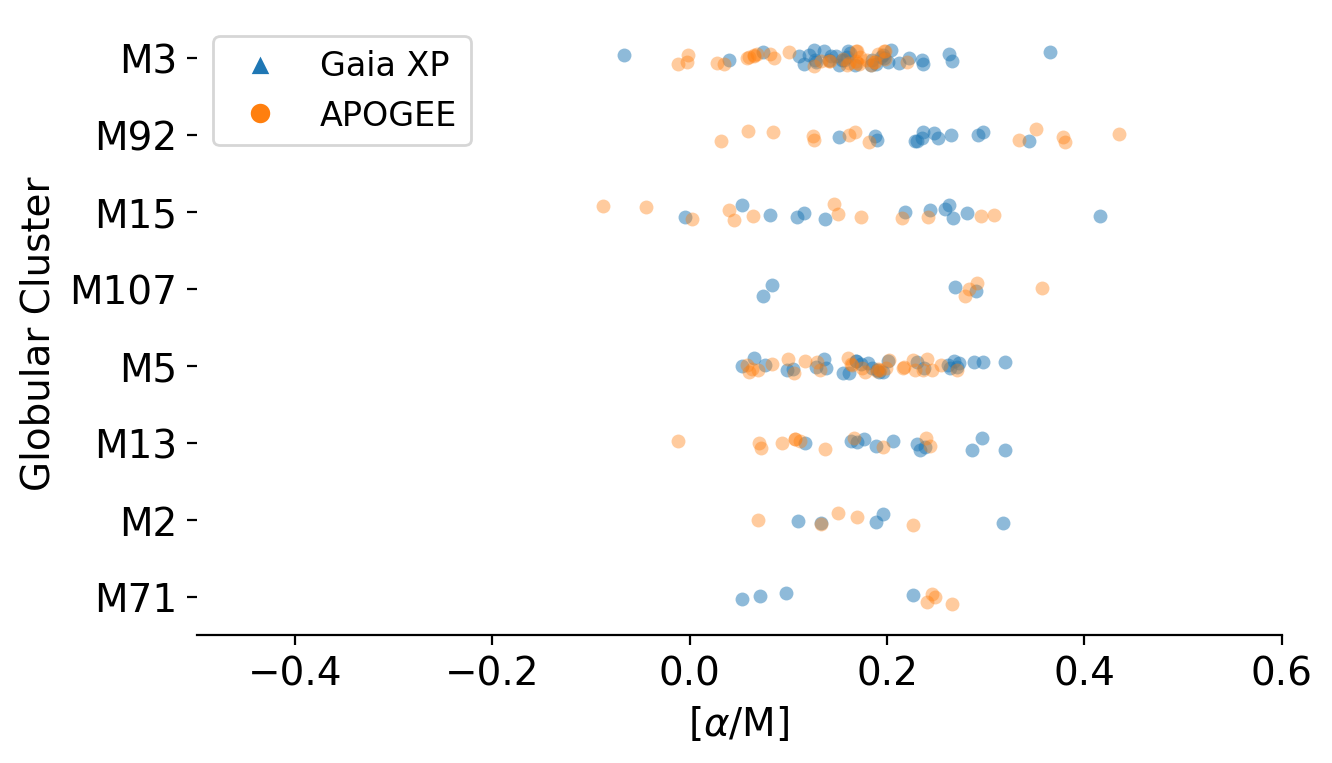

In [193]:
f, ax = plt.subplots(1,1,figsize=(7,4))
sns.despine(left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=df_gc, x="aom_model_cross", y="Cluster", 
    # hue="species",
    dodge=True, alpha=.5, zorder=1, legend=False,
    ax=ax
)

sns.stripplot(
    data=df_gc, x="ALPHA_M", y="Cluster", 
    dodge=True, alpha=.4, zorder=1, legend=False
)


legend_elements = [
    Line2D([0],[0], marker='^', color='w', label='Gaia XP', markerfacecolor='#1f77b4', markersize=8),
    Line2D([0],[0], marker='o', color='w', label='APOGEE', markerfacecolor='#ff7f0e', markersize=8)
]

ax.legend(handles=legend_elements, loc='upper left', fontsize=12)
ax.set_xlim([-0.5, 0.6]);
ax.set_xlabel(r"[$\alpha$/M]");
ax.set_ylabel("Globular Cluster ");

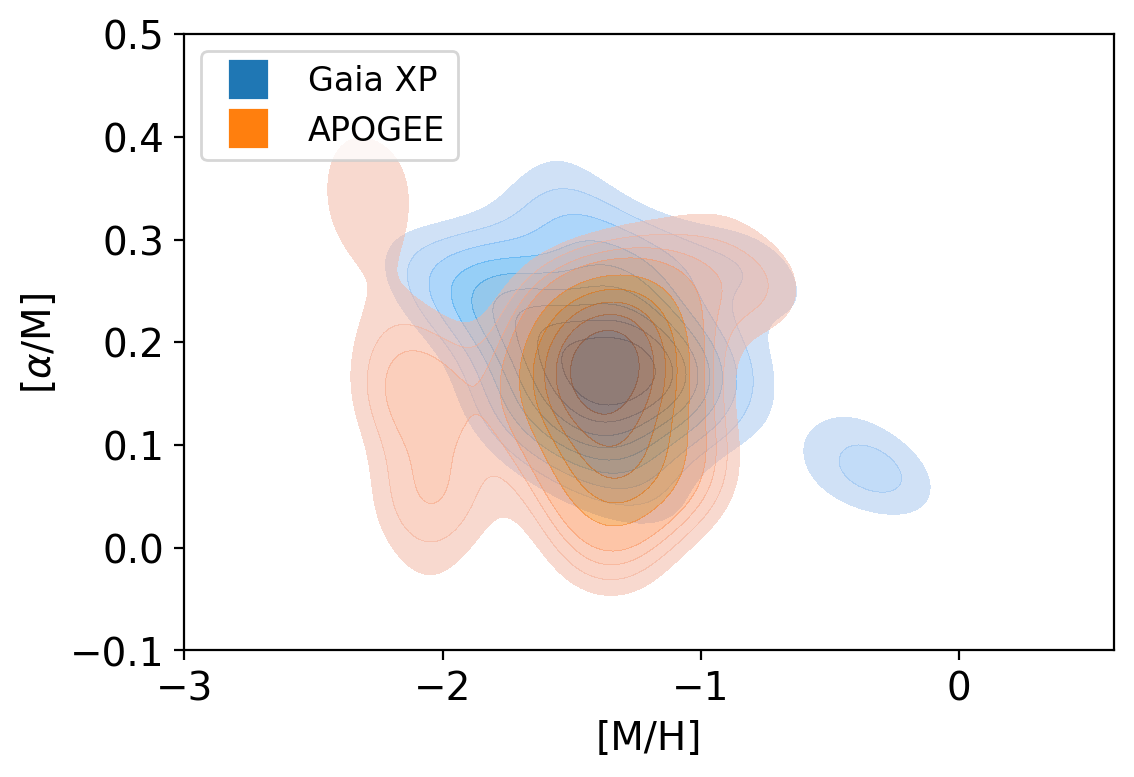

In [194]:
f, ax = plt.subplots(figsize=(6, 4))


sns.kdeplot(
    data=df_gc, x="moh_model_cross", y="aom_model_cross",
    fill=True, thresh=.15, 
    alpha=0.5, ax=ax, color='#1f77b4'
)
sns.kdeplot(
    data=df_gc, x="M_H", y="ALPHA_M",
    fill=True, thresh=.15, 
    alpha=0.5, ax=ax, color="#ff7f0e"
)
ax.set_xlabel("[M/H]");
ax.set_ylabel(r"[$\alpha$/H]");

legend_elements = [
    Line2D([0],[0], marker='s', color='w', label='Gaia XP', markerfacecolor='#1f77b4', markersize=15),
    Line2D([0],[0], marker='s', color='w', label='APOGEE', markerfacecolor='#ff7f0e', markersize=15)
]

ax.legend(handles=legend_elements, loc='upper left', fontsize=12)
ax.set_xlim([-3, 0.6]);
ax.set_ylim([-0.1, 0.5]);
ax.set_ylabel(r"[$\alpha$/M]");
ax.set_xlabel("[M/H]");

# Open Cluster

In [135]:
octable = Table.read("occam_member-DR17.fits")

df_ocraw = octable.to_pandas()
print(df_ocraw.shape, df_ocraw.columns)

(26699, 17) Index(['CLUSTER', 'APOGEE_ID', 'LOCATION_ID', 'GLON', 'GLAT', 'VHELIO_AVG',
       'VSCATTER', 'FE_H', 'FE_H_ERR', 'PMRA', 'PMRA_ERR', 'PMDEC',
       'PMDEC_ERR', 'RV_PROB', 'FEH_PROB', 'PM_PROB', 'CG_PROB'],
      dtype='object')


In [143]:
df_ocraw = df_ocraw.assign(tmass_id=[i.decode('utf-8') for i in df_ocraw['APOGEE_ID'].values])


df_oc = pd.merge(df, df_ocraw, on="tmass_id", )
df_oc = df_oc.assign(CLUSTER=[i.decode('utf-8') for i in df_oc['CLUSTER'].values])
print(df_oc.shape)

(3245, 82)


In [161]:
cluster_names = df_oc['CLUSTER'].unique()

group_oc_cluster = df_oc.groupby(['CLUSTER'])
n_cluster = np.array([len(g) for gname, g in group_oc_cluster])

df_oc_largemember = pd.DataFrame()

for gname, g in group_oc_cluster:
    
    if len(g)>50:
        df_oc_largemember = pd.concat([df_oc_largemember, g])
        

In [162]:
df_oc_largemember['CLUSTER'].unique()


array(['ASCC 19', 'ASCC 21', 'Collinder 69', 'Melotte 20', 'Melotte 22',
       'NGC 188', 'NGC 2632', 'NGC 2682', 'NGC 6811', 'NGC 6819',
       'NGC 752', 'NGC 7789'], dtype=object)

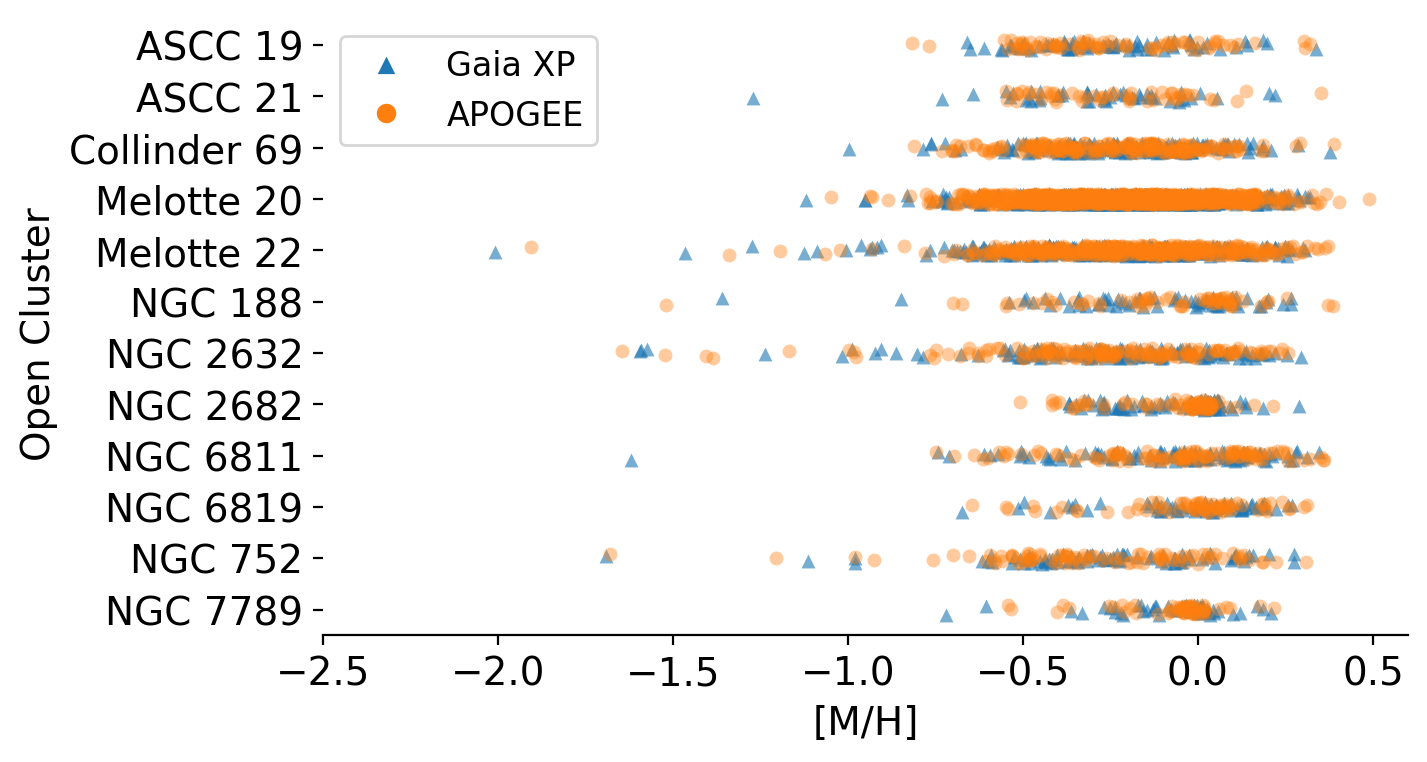

In [195]:
# Initialize the uniquere
from matplotlib.lines import Line2D

f, ax = plt.subplots(1,1,figsize=(7,4))
sns.despine(left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=df_oc_largemember, x="moh_model_cross", y="CLUSTER", 
    # hue="species",
    dodge=True, alpha=.6, zorder=1, legend=False,
    ax=ax, marker='^'
)

sns.stripplot(
    data=df_oc_largemember, x="M_H", y="CLUSTER", 
    dodge=True, alpha=.4, zorder=1, legend=False
)


legend_elements = [
    Line2D([0], [0], marker='^', color='w', label='Gaia XP', markerfacecolor='#1f77b4', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='APOGEE', markerfacecolor='#ff7f0e', markersize=8),
]

ax.legend(handles=legend_elements, loc='upper left', fontsize=12)
ax.set_xlim([-2.5, 0.6]);
ax.set_xlabel("[M/H]");
ax.set_ylabel("Open Cluster ");

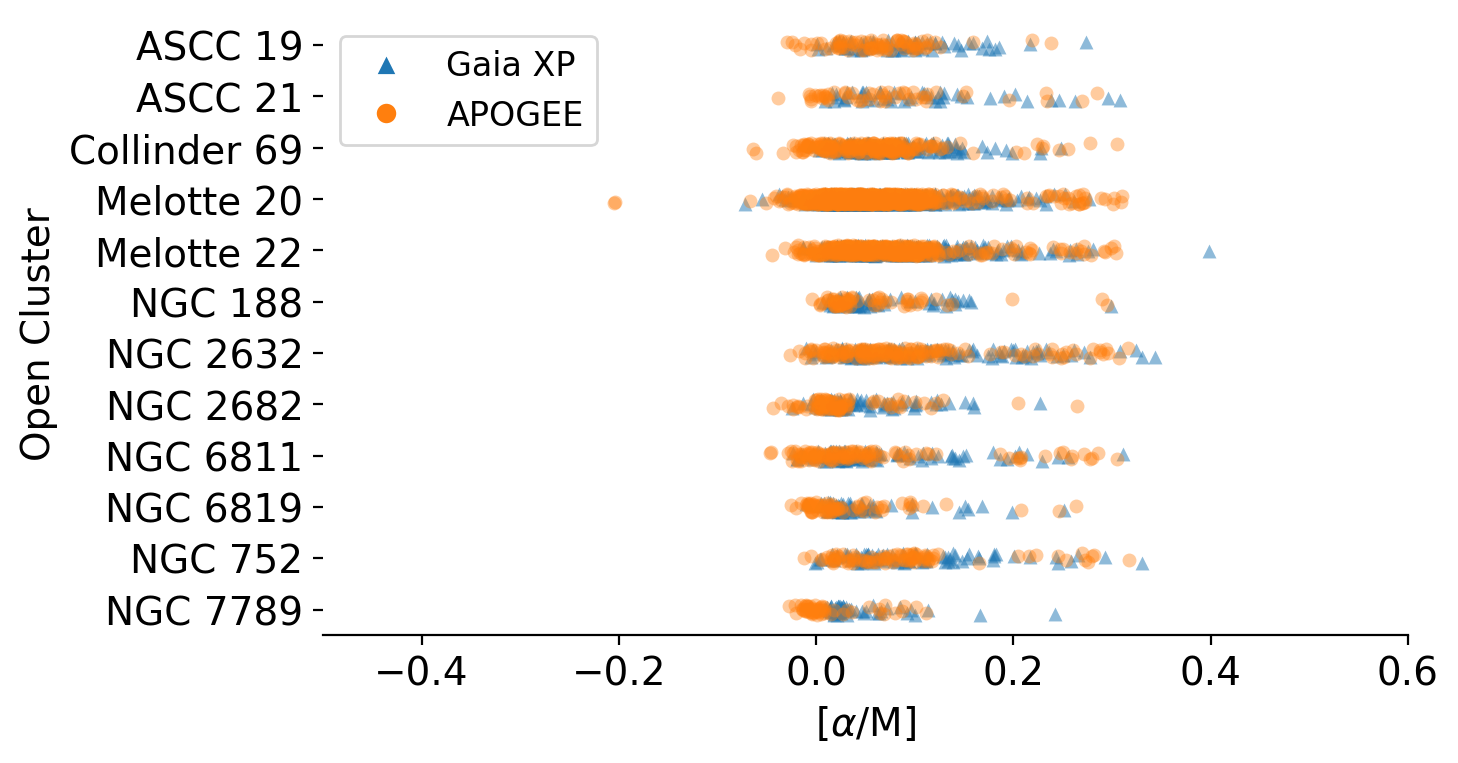

In [196]:
f, ax = plt.subplots(1,1,figsize=(7,4))
sns.despine(left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=df_oc_largemember, x="aom_model_cross", y="CLUSTER", 
    # hue="species",
    dodge=True, alpha=.5, zorder=1, legend=False,
    ax=ax, marker='^'
)

sns.stripplot(
    data=df_oc_largemember, x="ALPHA_M", y="CLUSTER", 
    dodge=True, alpha=.4, zorder=1, legend=False
)


legend_elements = [
    Line2D([0],[0], marker='^', color='w', label='Gaia XP', markerfacecolor='#1f77b4', markersize=8),
    Line2D([0],[0], marker='o', color='w', label='APOGEE', markerfacecolor='#ff7f0e', markersize=8)
]

ax.legend(handles=legend_elements, loc='upper left', fontsize=12)
ax.set_xlim([-0.5, 0.6]);
ax.set_xlabel(r"[$\alpha$/M]");
ax.set_ylabel("Open Cluster ");

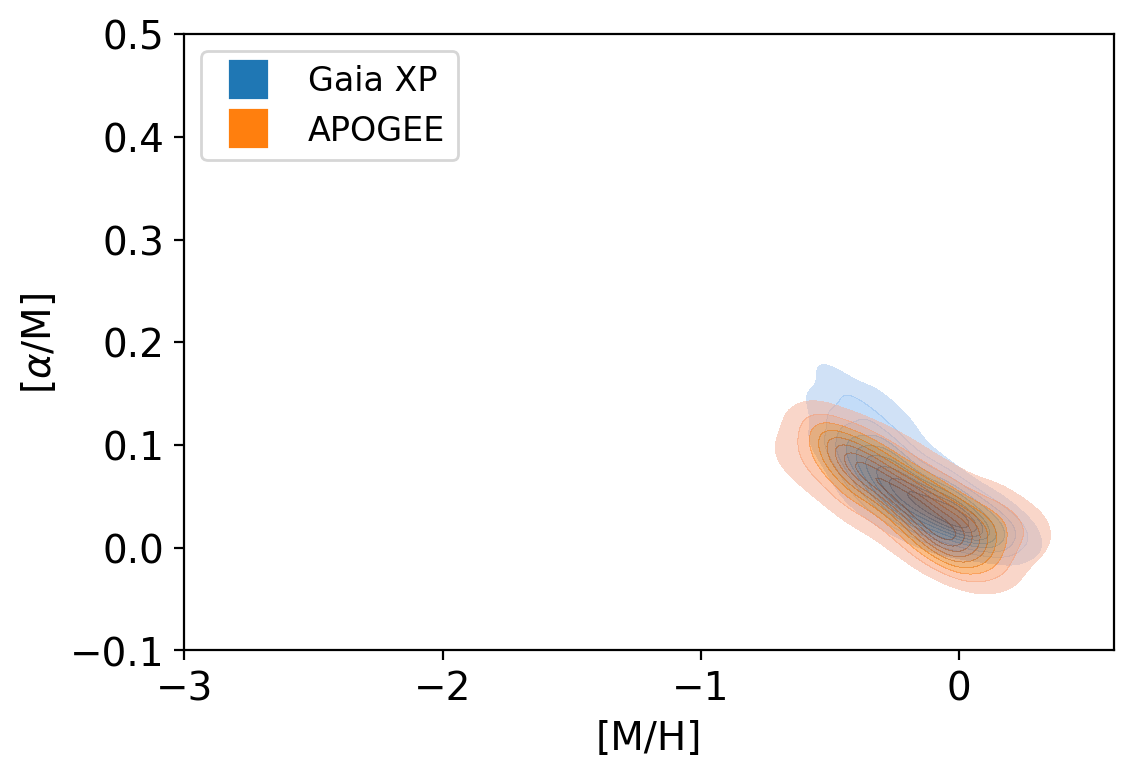

In [198]:
f, ax = plt.subplots(figsize=(6, 4))

# # Draw a contour plot to represent each bivariate density

sns.kdeplot(
    data=df_oc_largemember, x="moh_model_cross", y="aom_model_cross",
    fill=True, thresh=.15, 
    alpha=0.5, ax=ax, color='#1f77b4'
)
sns.kdeplot(
    data=df_oc_largemember, x="M_H", y="ALPHA_M",
    fill=True, thresh=.15, 
    alpha=0.5, ax=ax, color="#ff7f0e"
)
ax.set_xlabel("[M/H]");
ax.set_ylabel(r"[$\alpha$/H]");

legend_elements = [
    Line2D([0],[0], marker='s', color='w', label='Gaia XP', markerfacecolor='#1f77b4', markersize=15),
    Line2D([0],[0], marker='s', color='w', label='APOGEE', markerfacecolor='#ff7f0e', markersize=15)
]

ax.legend(handles=legend_elements, loc='upper left', fontsize=12)
ax.set_xlim([-3, 0.6]);
ax.set_ylim([-0.1, 0.5]);
ax.set_ylabel(r"[$\alpha$/M]");
ax.set_xlabel("[M/H]");

# Inference

In [30]:

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/jdli/TransSpectra/")
import torch
from torch.utils.data import DataLoader
# from transformer import TransformerReg, TransAm
from model import Spec2label
from data import GaiaXPlabel_cont_infer
from matplotlib.colors import LogNorm
import cmasher as cmr
import copy
from pylab import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
data_dir = "/data/jdli/gaia/"
tr_file = "ocCastroGinard_xp_raw.npy"

device = torch.device('cuda:0')
BATCH_SIZE = 256

ocdata  = GaiaXPlabel_cont_infer(data_dir+tr_file, part_train=False, device=device)
oc_loader = DataLoader(ocdata, batch_size=BATCH_SIZE)

In [33]:
modelA = Spec2label(
        n_encoder_inputs=55*2+3,
        n_outputs=2,
        lr=1e-5,
        dropout=0.2,
        channels=128,
        n_heads=8,
        n_layers=8,
    ).to(device)

In [35]:
model_name_A = '/model/GXPcont_abundance/enc_GXPcont_221110_NGlll_A_ep300.pt'

modelA.load_state_dict(torch.load(data_dir+model_name_A))


<All keys matched successfully>

In [37]:
from tqdm import tqdm


def inference(data_loader, model):
    
    out_lst, y_lst = np.array([]), np.array([])
    id_lst = []

    with torch.no_grad():
        for data in tqdm(data_loader):
            output = model(data['x'])
            out_lst = np.append(out_lst, output.cpu().numpy())
            
            id_batch =  list(np.int64(data['id']))
            
            del output, data
            for idl in id_batch:
                id_lst.append(idl)

    out_lst = np.array(out_lst).reshape(-1,2)
    return out_lst, id_lst


preds, idxs = inference(oc_loader, modelA)


100%|████████████████████████████████████████████████████████████████████████| 85/85 [00:19<00:00,  4.46it/s]


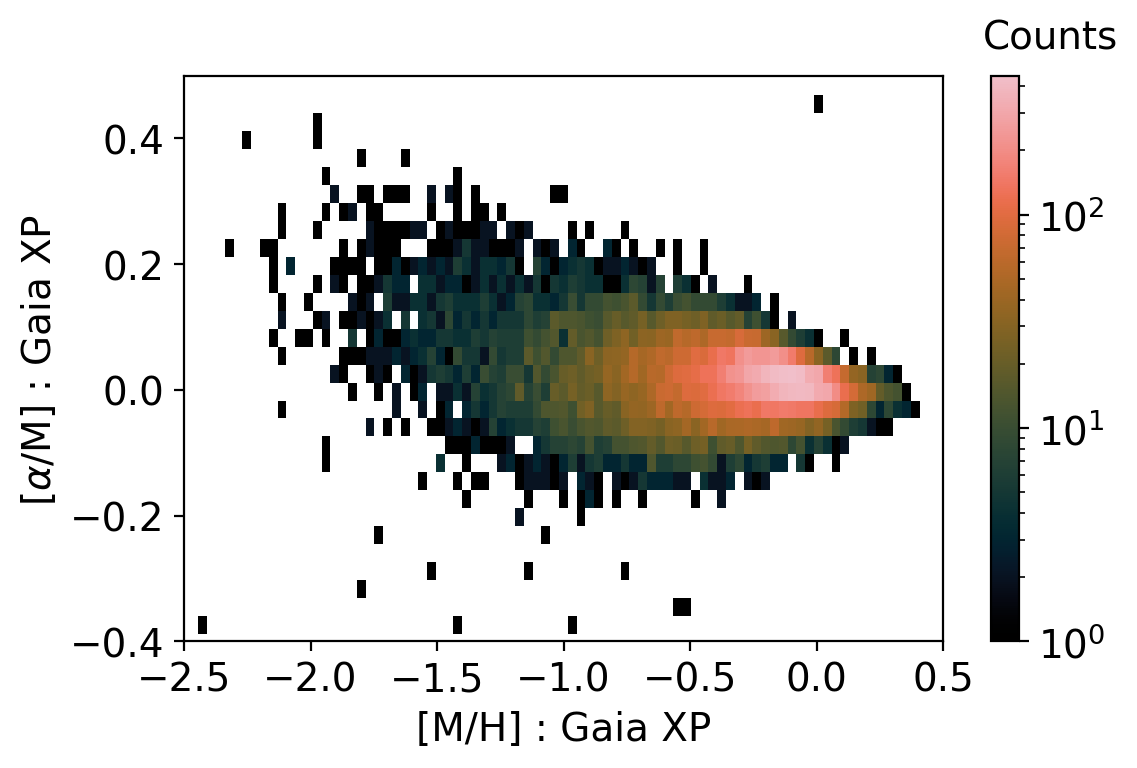

In [44]:
ind = (preds[:,0]>-5.) & (preds[:,1]>-5.)

fig, ax1 = plt.subplots(1,1, figsize=(6,4))

_, _, _, img1 = ax1.hist2d(preds[:,0][ind], preds[:,1][ind], bins=200,
                           norm=LogNorm(), cmap=cmap)


clb1 = fig.colorbar(img1, ax=ax1,);
clb1.set_label('Counts', labelpad=-20, y=1.1, rotation=0)
               

ax1.set_xlabel("[M/H] : Gaia XP");
ax1.set_ylabel(r"[$\alpha$/M] : Gaia XP");


ax1.set_xlim([-2.5, 0.5]);
ax1.set_ylim([-0.4, 0.5])
    
plt.tight_layout()

In [45]:
result_df = pd.DataFrame({
    'M_H':preds[:,0], 'ALPHA_M':preds[:,1],
    'source_id':idxs
})

In [63]:
oc_infer = result_df.merge(ocdf, left_on='source_id', right_on='GaiaEDR3')
print(oc_infer.shape)

cat = Table.read(os.environ["SDSS_LOCAL_SAS_MIRROR"]+"/dr17/ap17_gdr3_tr.fits")
cat.info

names = [name for name in cat.colnames if len(cat[name].shape)<=1]
df_ap = cat[names].to_pandas()


oc_infer = oc_infer.merge(df_ap, left_on='source_id', right_on='GAIAEDR3_SOURCE_ID')
print(oc_infer.shape)

(20921, 33)
(3, 92)


In [ ]:
from matplotlib.lines import Line2D
import seaborn as sns

f, ax = plt.subplots(1,1,figsize=(7,4))
sns.despine(left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=oc_infer[:100], x="ALPHA_M", y="Cluster", 
    # hue="species",
    dodge=True, alpha=.9, zorder=1, legend=False,
    ax=ax
)

# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', label='Gaia', markerfacecolor='#1f77b4', markersize=8),
#     Line2D([0], [0], marker='o', color='w', label='Trans.', markerfacecolor='#ff7f0e', markersize=8)
# ]
# ax.legend(handles=legend_elements, loc='lower left')
ax.set_xlim([-2, 0.6]);
# ax.set_ysticks([]);
ax.set_xlabel(r"[M/H]");
ax.set_ylabel("Globular Cluster ");